In [1]:
#Librerias
import matplotlib.pyplot as plt
import skimage
from skimage import io
import cv2 as cv
import numpy as np

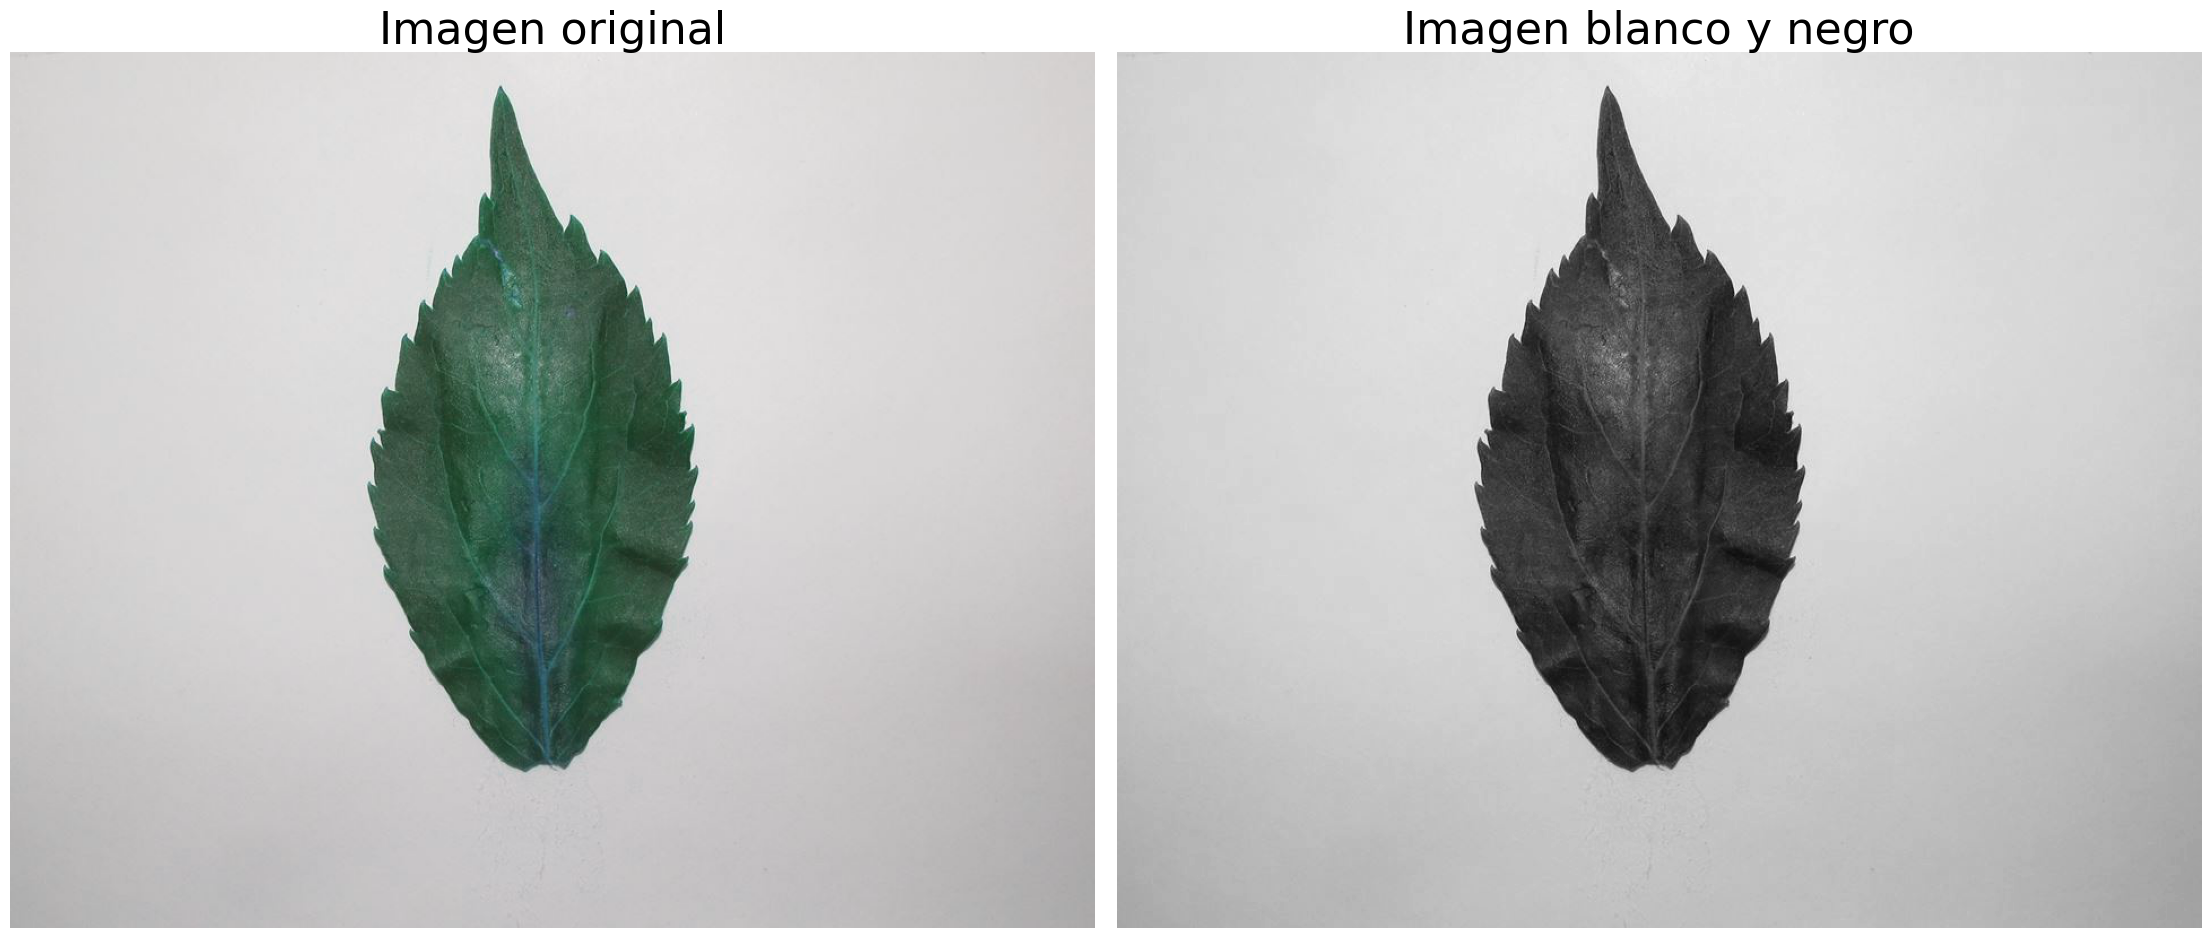

In [2]:
#Lectura de la imagen
Im1 = cv.imread('hoja00.jpg')
#Pasamos la imagen RGB to gray
Im = cv.cvtColor(Im1, cv.COLOR_RGB2GRAY)

#Visualización: Imagen original - Imagen Blanco y negro
fig, axes = plt.subplots(1, 2,
                         figsize=(22,21),constrained_layout=True)

# Plot 
im = axes[0].imshow(Im1, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Imagen original', fontsize=32)

axes[1].imshow(Im, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Imagen blanco y negro', fontsize=32)
plt.show()

Text(0.5, 1.0, 'Binarización + Llenado de huecos')

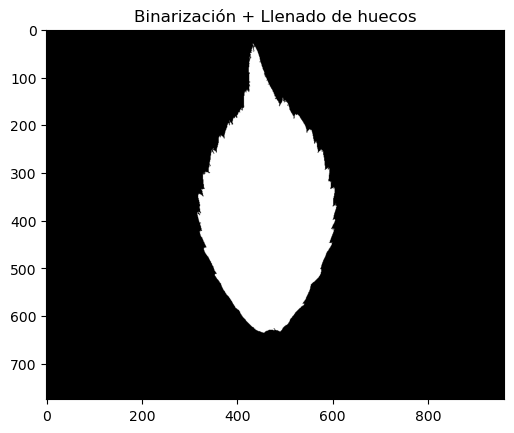

In [3]:
#Binarización de la imagen 
b , imgBin = cv.threshold(Im, 100 ,255, cv.THRESH_BINARY)
# *****************************************************************************************************************************
#Llenado de huecos--------------------------------------------------------------------------------------------------------------
# *****************************************************************************************************************************
#Copiar la imagen umbralizada
im_floodfill = imgBin.copy()
 
# Mask para llenado de huecoos
# El tamaño de la máscara debe ser 2 pixeles más que la imagen en ancho y alto.
h, w = imgBin.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill desde el punto (0, 0)
cv.floodFill(im_floodfill, mask, (0,0), 0);
 
# Invertir la imagen de llenar huecos
im_floodfill_inv = cv.bitwise_not(im_floodfill)
 
# Combinar las dos imagenes para obtener el llenado y fondo apropiado
H = cv.bitwise_xor(im_floodfill, imgBin)
#Invertir H
H = ~H
plt.imshow(H, cmap='gray')
plt.title('Binarización + Llenado de huecos')


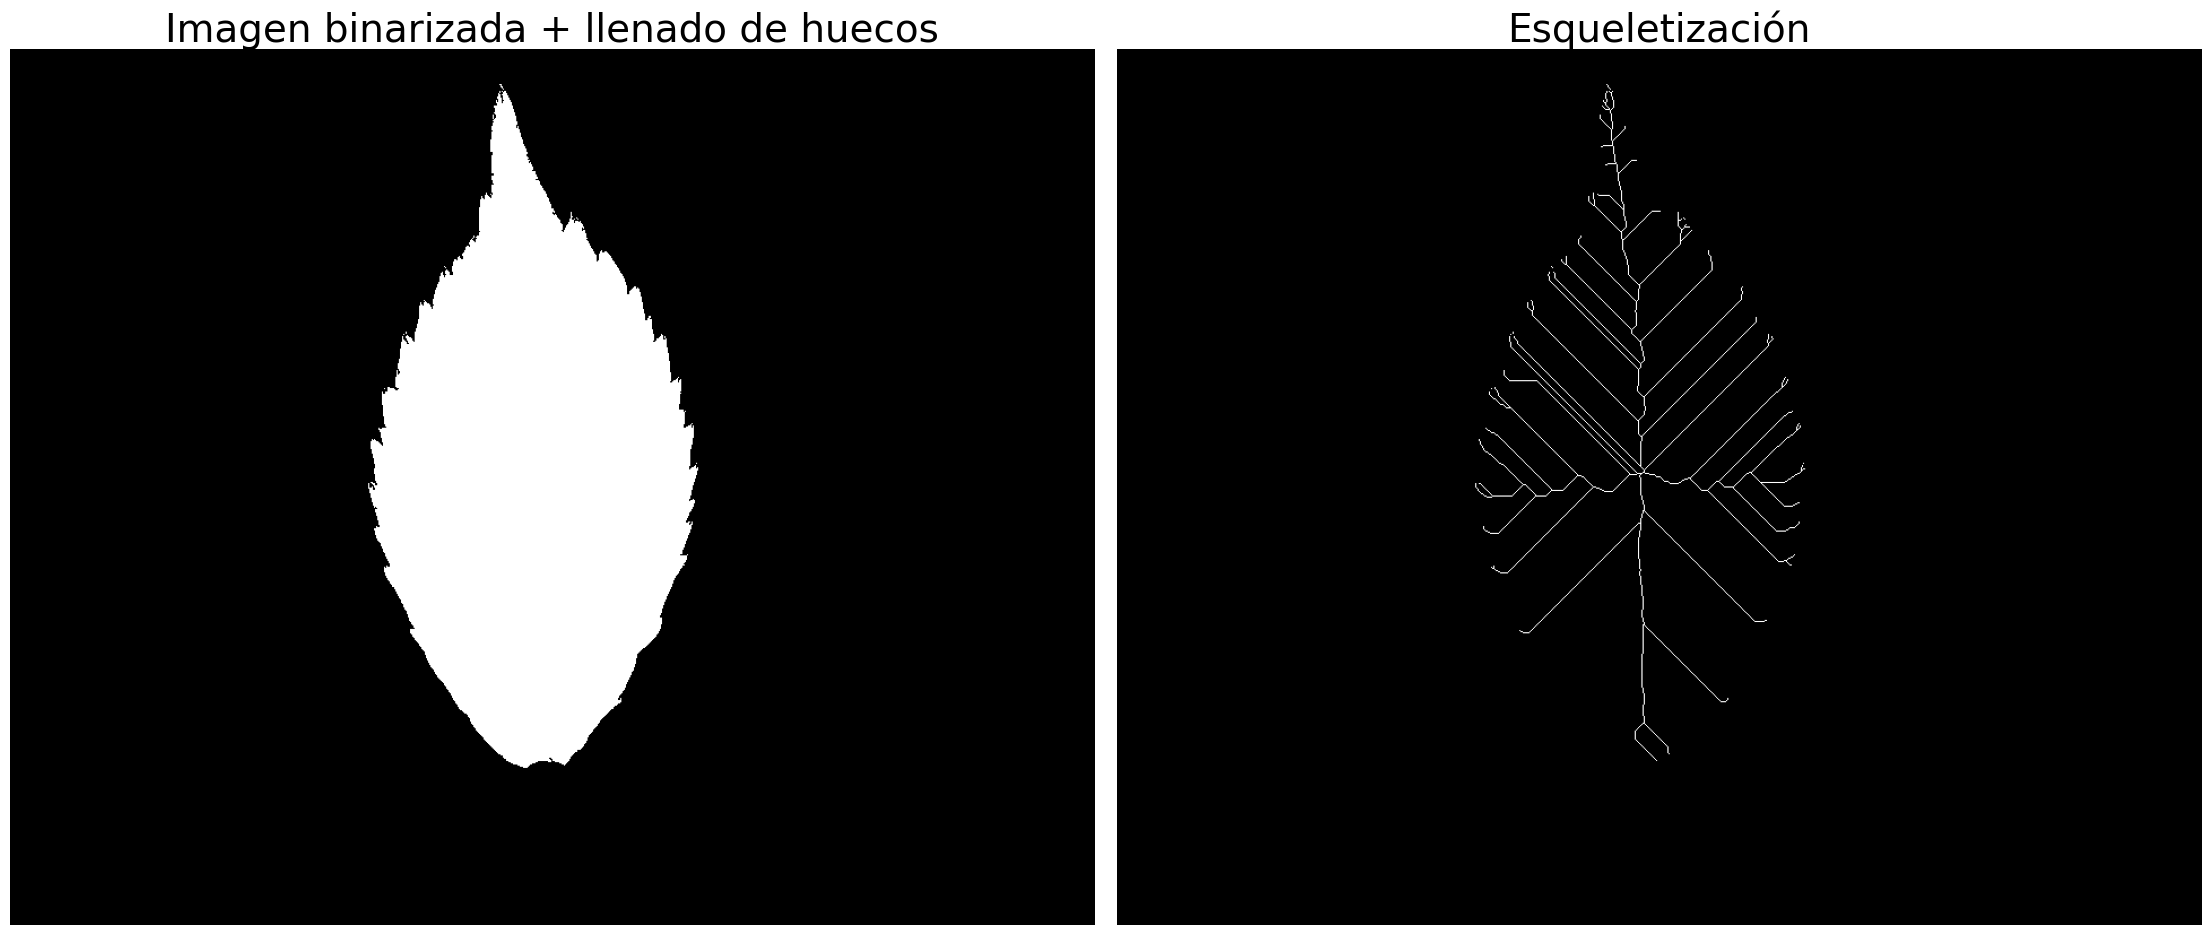

In [10]:
#Esqueletización ... Skeleton
from skimage import morphology

#La función recibe imagenes con valores de 0 y 1, por tanto debemos proceder a reemplazar 255 por 1 
def binn01(image):
    (n,m) = image.shape
    for f in range (0,n):
            for c in range (0,m):
                if image[f,c] == 255:
                    image[f,c] = 1
                else:
                    image[f,c]
    return image

H2 = binn01(H)
skeletonn = morphology.skeletonize(H2)

fig, axes = plt.subplots(1, 2,
                         figsize=(22,21),constrained_layout=True)

# Plot 
im = axes[0].imshow(H, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Imagen binarizada + llenado de huecos', fontsize=28)

axes[1].imshow(skeletonn, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Esqueletización', fontsize=28)
plt.show()


In [16]:
y = np.expand_dims(skeletonn, axis=-1)
print(y.shape)


(775, 960, 1)


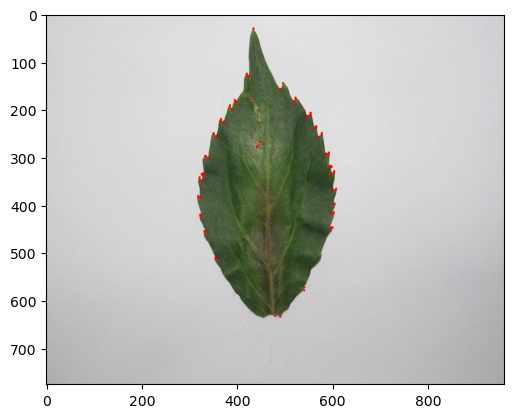

In [18]:
#Encontrando esquinas
filename = 'hoja00.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

dst = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(dst)

In [22]:
#Encontrar el número de corners
num_corners = np.sum(dst > 0.01 * dst.max())
print(num_corners)

1830
